# GRAPE calculation of control fields for iSWAP implementation

Robert Johansson (robert@riken.jp)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from qutip import *
from qutip_qip.operations import iswap

In [3]:
T = 1
times = np.linspace(0, T, 100)

In [4]:
U = iswap()
R = 50
H_ops = [#tensor(sigmax(), identity(2)),
         #tensor(sigmay(), identity(2)),
         #tensor(sigmaz(), identity(2)),
         #tensor(identity(2), sigmax()),
         #tensor(identity(2), sigmay()),
         #tensor(identity(2), sigmaz()),
         tensor(sigmax(), sigmax()),
         tensor(sigmay(), sigmay()),
         tensor(sigmaz(), sigmaz())]

H_labels = [#r'$u_{1x}$',
            #r'$u_{1y}$',
            #r'$u_{1z}$',
            #r'$u_{2x}$',
            #r'$u_{2y}$',
            #r'$u_{2z}$',
            r'$u_{xx}$',
            r'$u_{yy}$',
            r'$u_{zz}$',
        ]

In [5]:
H0 = 0 * np.pi * (tensor(sigmaz(), identity(2)) + tensor(identity(2), sigmaz()))

# GRAPE

In [6]:
from qutip.control.grape import plot_grape_control_fields, _overlap, grape_unitary_adaptive, cy_grape_unitary

In [7]:
from scipy.interpolate import interp1d
from qutip.ui.progressbar import TextProgressBar

In [8]:
u0 = np.array([np.random.rand(len(times)) * (2 * np.pi / T) * 0.01 for _ in range(len(H_ops))])

u0 = [np.convolve(np.ones(10)/10, u0[idx, :], mode='same') for idx in range(len(H_ops))]

In [9]:
result = cy_grape_unitary(U, H0, H_ops, R, times, u_start=u0, eps=2*np.pi/T,
                          progress_bar=TextProgressBar())

10.0%. Run time:   3.90s. Est. time left: 00:00:00:35
20.0%. Run time:   7.00s. Est. time left: 00:00:00:28
30.0%. Run time:   9.97s. Est. time left: 00:00:00:23
40.0%. Run time:  13.15s. Est. time left: 00:00:00:19
50.0%. Run time:  16.78s. Est. time left: 00:00:00:16
60.0%. Run time:  19.91s. Est. time left: 00:00:00:13
70.0%. Run time:  23.04s. Est. time left: 00:00:00:09
80.0%. Run time:  26.20s. Est. time left: 00:00:00:06
90.0%. Run time:  29.42s. Est. time left: 00:00:00:03
Total run time:  31.84s


In [10]:
#result = grape_unitary(U, H0, H_ops, R, times, u_start=u0, eps=2*np.pi/T,
#                       progress_bar=TextProgressBar())

## Plot control fields for iSWAP gate in the presense of single-qubit tunnelling

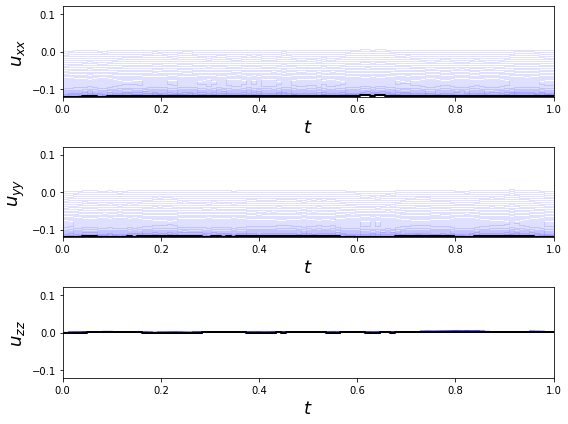

In [11]:
plot_grape_control_fields(times, result.u / (2 * np.pi), H_labels, uniform_axes=True);

In [12]:
# compare to the analytical results
np.mean(result.u[-1,0,:]), np.mean(result.u[-1,1,:]), np.pi/(4 * T)

(-0.7416507430911286, -0.7416784023879961, 0.7853981633974483)

## Fidelity

In [13]:
U

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]

In [14]:
result.U_f.tidyup(1e-2)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.99999815+0.j        0.        +0.j        0.        +0.j
  0.        +0.j       ]
 [0.        +0.j        0.09335632+0.j        0.        +0.9956309j
  0.        +0.j       ]
 [0.        +0.j        0.        +0.9956309j 0.09335632+0.j
  0.        +0.j       ]
 [0.        +0.j        0.        +0.j        0.        +0.j
  0.99999815+0.j       ]]

In [15]:
_overlap(U, result.U_f).real

0.9978145256160434

## Test numerical integration of GRAPE pulse

In [16]:
c_ops = []

In [17]:
U_f_numerical = propagator(result.H_t, times, c_ops, args={})

# Process tomography

In [ ]:
_overlap(U, U_f_numerical[-1]).real

In [ ]:
op_basis = [[qeye(2), sigmax(), sigmay(), sigmaz()]] * 2
op_label = [["i", "x", "y", "z"]] * 2

In [ ]:
fig = plt.figure(figsize=(8,6))

U_ideal = spre(U) * spost(U.dag())

chi = qpt(U_ideal, op_basis)

fig = qpt_plot_combined(chi, op_label, fig=fig, threshold=0.001)

In [ ]:
op_basis = [[qeye(2), sigmax(), sigmay(), sigmaz()]] * 2
op_label = [["i", "x", "y", "z"]] * 2

In [23]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,5.0.0.dev0+ee51e50
Numpy,1.21.0
SciPy,1.6.2
matplotlib,3.3.4
Cython,0.29.23
Number of CPUs,4
BLAS Info,OPENBLAS
IPython,7.31.1
Python,"3.8.10 (default, Mar 15 2022, 12:22:08) [GCC 9.4.0]"
OS,posix [linux]
